In [3]:
from prep_files_for_altar import main

multi, faults, datasets, trans = main()

---------------------------------
---------------------------------
Initializing fault fault0
---------------------------------
---------------------------------
Initializing fault fault1
---------------------------------
---------------------------------
Initialize InSAR data set A064_20190704-0710
Read from file /Users/hintont/Dev/projects/Ridgecrest/data/insar/A064_20190704-0710/unwrapped.grd into data set A064_20190704-0710
---------------------------------
---------------------------------
Initialize InSAR covariance tools A064_20190704-0710
Masking data set A064_20190704-0710
     Mask: 242.12 <= Lon <= 242.7 || 35.53 <= Lat <= 35.9
Computing covariograms
Computing 1-D empirical semivariogram function for data set A064_20190704-0710
Selecting 5571 random samples to estimate the covariance function
Estimated Orbital Plane: 4.539062343212429e-06xy + -0.01898681064389079x + -0.0013828022228778154y + 5.767468048761202
Build the permutations
Digitize the histogram
Fitting Covariance f

Carefull: there is no NaNs, the interpolation might be a whole load of garbage...


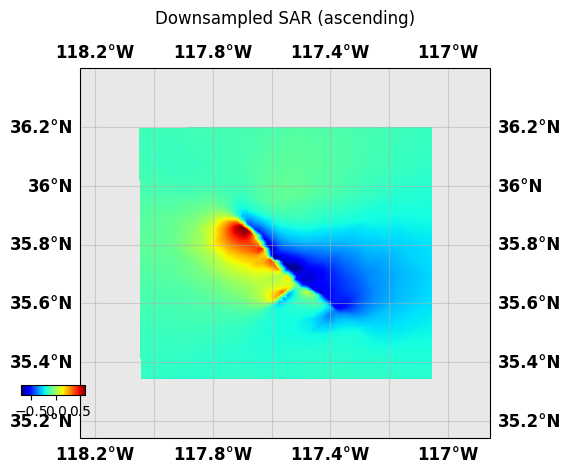

Carefull: there is no NaNs, the interpolation might be a whole load of garbage...


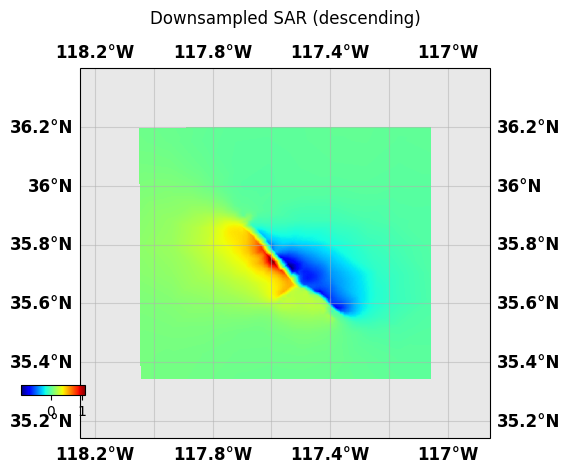

In [4]:
datasets[0].plot(plotType="flat", data="data", title="Downsampled SAR (ascending)")
datasets[1].plot(plotType="flat", data="data", title="Downsampled SAR (descending)")

In [5]:
import numpy as np

for fault in faults:
   fault.buildCm(1., 1.)
trans.buildCm(1000.)
multi.assembleCm()

bounds = []
for f in range(len(faults)):
   for i in range(faults[f].N_slip):
       bounds.append([0,15.])
   for i in range(faults[f].N_slip):
       bounds.append([-2., 2.])   
for i in range(trans.TransformationParameters):
   bounds.append([-100., 100.])
mprior = np.zeros((len(bounds),))

multi.ConstrainedLeastSquareSoln(bounds=bounds, 
                              iterations=400,
                              method='L-BFGS-B',
                              mprior=mprior, 
                              tolerance=1e-7, 
                              maxfun=1e10, 
                              checkIter=True)

---------------------------------
---------------------------------
Assembling the Cm matrix 
Sigma = 1.0
Lambda = 1.0
Lambda0 = 0.2633518553278455
---------------------------------
---------------------------------
Assembling the Cm matrix 
Sigma = 1.0
Lambda = 1.0
Lambda0 = 0.44255408054799683
---------------------------------
---------------------------------
Computing the Constrained least squares solution
Final data space size: 1542
Final model space size: 648
Computing the inverse of the model covariance
Computing the inverse of the data covariance
Performing constrained minimzation


In [6]:
multi.distributem()
trans.removePredictions(datasets)

#----------------------------------------
# Plot predictions and inferred slip
for data in datasets:
   data.buildsynth(multi.faults)

normalizing factors are  450.06677849773735 3953.570731482895 45.01999203633483 52.751636264706576
normalizing factors are  450.0782897422788 3953.4189022280952 45.04727138610593 52.90370512886875


Carefull: there is no NaNs, the interpolation might be a whole load of garbage...


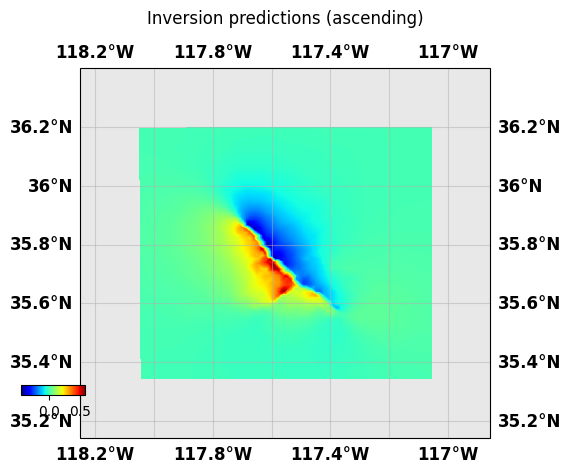

Carefull: there is no NaNs, the interpolation might be a whole load of garbage...


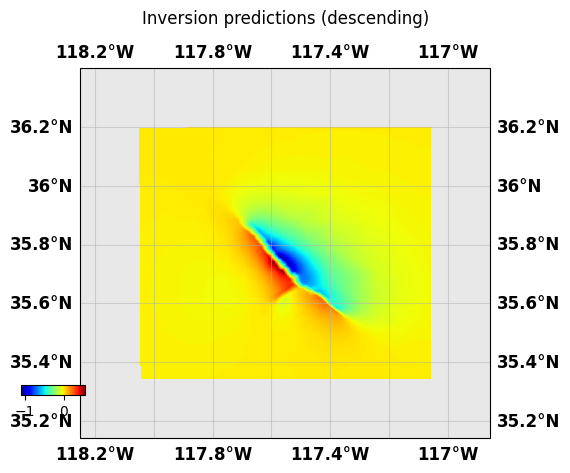

In [7]:
datasets[0].plot(plotType="flat", data="synth", title="Inversion predictions (ascending)")
datasets[1].plot(plotType="flat", data="synth", title="Inversion predictions (descending)")

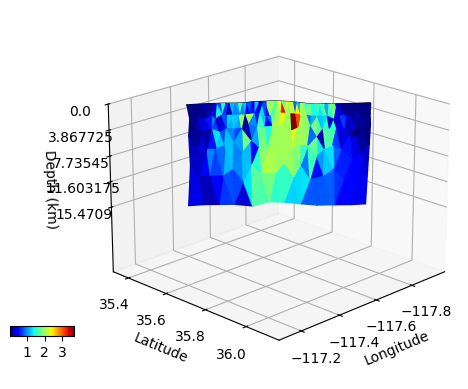

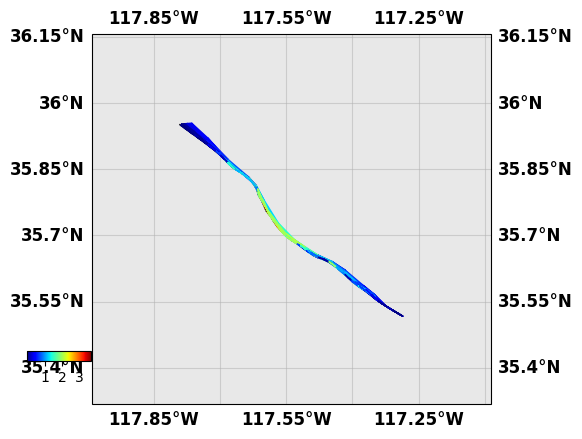

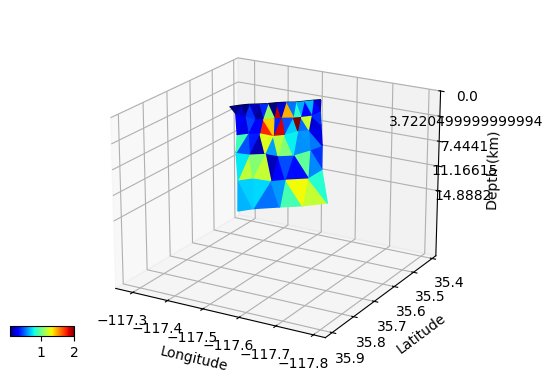

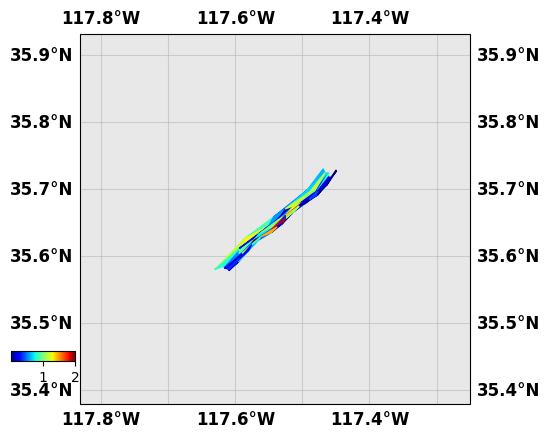

In [12]:
faults[0].plot(view=(20., 45.))
faults[1].plot(view=(20., 120.))